# Содержание

1. [Задача](#задача)
2. [Ход работы](#ход-работы)
    1. [Нахождение отношения последующих членов ряда](#нахождение-отношения-последующих-членов-ряда)
    2. [Табулирование функции на $[a, b]$ с шагом $h$](#табулирование-функции-на-a-b-с-шагом-h)
    3. [Построение интерполяционного полинома Лагранжа](#построение-интерполяционного-полинома-лагранжа)
    4. [Построение графика изменения погрешности](#построение-графика-изменения-погрешности)
    5. [Табулирование функции на $[a, b]$ в узлах Чебышева](#табулирование-функции-на-a-b-в-узлах-чебышева)
    6. [Повторное построение графика изменения погрешности](#повторное-построение-графика-изменения-погрешности)
3. [Вывод](#вывод)
4. [Используемая литература](#используемая-литература)

# Задача
Одна из специальных функций математической физики — интегральный синус, определяется следующим образом:
$$
\text{Si}(x) = \int_0^x \frac{\sin t}{t} \, dt
$$
Цель задания — изучить и сравнить различные способы приближения вычисления этой функции.

Для этого:
1. Найти отношение последующих членов ряда Тейлора для заданной синусовой интегральной функции:
$$
\text{Si}(x) = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)(2n+1)!}
$$
2. Протабулировать $\text{Si}(x)$ на отрезке $[a, b]$ с шагом $h$ и точностью $\epsilon$ ($a = 0$, $b = 4$, $h = 6$, $\epsilon = 10^{-6}$), основываясь на ряде Тейлора и получить таким образом таблицу.
3. По полученной таблице значений построить интерполяционный полином Лагранжа, приближающий $\text{Si}(x)$
4. Построить график изменения погрешности при увеличении числа точек
5. Протабулировать отрезок $[a, b]$, найдя корни полинома Чебышева
$$
x_i = \frac{a + b}{2} + \frac{b - a}{2} cos(\frac{\pi(2i + 1)}{2n + 2}), i = 0 ... n
$$


# Ход работы

## Нахождение отношения последующих членов ряда

Чтобы оптимизировать алгоритм вычисления заданного ряда, вычислим отношение последующего члена ряда к предыдущему. Благодаря такой оптимизации будет возможно считать следующий член через предыдущий, не вычисляя факториалы заново.


Общий член ряда для $\text{Si}(x)$ имеет вид:

$$
a_n = \frac{(-1)^n x^{2n+1}}{(2n+1) \cdot (2n+1)!}
$$

Следующий член:

$$
a_{n+1} = \frac{(-1)^{n+1} x^{2n+3}}{(2n+3) \cdot (2n+3)!}
$$

Теперь вычислим отношение $q_n(x) = \frac{a_{n+1}}{a_n}$, показывая все преобразования шаг за шагом.

$$
q_n(x) = \frac{a_{n+1}}{a_n} = \frac{ \frac{(-1)^{n+1} x^{2n+3}}{(2n+3) \cdot (2n+3)!} }{ \frac{(-1)^n x^{2n+1}}{(2n+1) \cdot (2n+1)!} } = \frac{(-1)^{n+1} x^{2n+3}}{(2n+3) \cdot (2n+3)!} \cdot \frac{(2n+1) \cdot (2n+1)!}{(-1)^n x^{2n+1}}
$$

Сначала упростим знаки и степени $x$:

$$
= (-1)^{n+1} \cdot \frac{1}{(-1)^n} \cdot \frac{x^{2n+3}}{x^{2n+1}} \cdot \frac{(2n+1)}{(2n+3)} \cdot \frac{(2n+1)!}{(2n+3)!}
$$

$$
= (-1)^{(n+1) - n} \cdot x^{2} \cdot \frac{(2n+1)}{(2n+3)} \cdot \frac{(2n+1)!}{(2n+3)!} = -x^2 \cdot \frac{(2n+1)}{(2n+3)} \cdot \frac{(2n+1)!}{(2n+3)!}
$$

Теперь разберёмся с факториалами. Мы знаем, что:

$$
(2n+3)! = (2n+3) \cdot (2n+2) \cdot (2n+1)!
$$

Поэтому:

$$
\frac{(2n+1)!}{(2n+3)!} = \frac{(2n+1)!}{(2n+3) \cdot (2n+2) \cdot (2n+1)!} = \frac{1}{(2n+3) \cdot (2n+2)}
$$

(Здесь $(2n+1)!$ в числителе и знаменателе сокращается полностью, оставляя только обратные множители от $(2n+3)$ и $(2n+2)$.)

Подставляем это обратно:

$$
q_n(x) = -x^2 \cdot \frac{(2n+1)}{(2n+3)} \cdot \frac{1}{(2n+3) \cdot (2n+2)} = -x^2 \cdot \frac{(2n+1)}{(2n+3) \cdot (2n+3) \cdot (2n+2)}
$$

$$
= -x^2 \cdot \frac{(2n+1)}{(2n+2) \cdot (2n+3)^2}
$$

$$
= -\frac{x^2 (2n+1)}{(2n+2) (2n+3)^2}
$$

Таким образом, добавочный член $a_{n+1}$ можно получить как $a_{n+1} = q_n(x) \cdot a_n$, где $q_n(x)$ выражено через предыдущий член без полного перерасчёта факториалов.

Опишем отношение функцией

In [102]:
def ratio_series(x: float, n: int) -> float:
    """
    q_n(x) - отношения последующего члена к предыдущему
    :param x: аргумент
    :param n: индекс члена ряда
    """
    return -(
            x**2 * (2*n + 1)
    ) / (
            (2*n + 2) * (2*n + 3)**2
    )

Теперь опишем нахождение суммы ряда следующей функцией, используя функцию отношения `ratio_series`

In [103]:
def series(x: float, eps: float = 10 ** -6) -> float:
    """
    S_n(x) - реализация с использованием заранее вычисленного отношения последующего члена
    :param x: аргумент
    :param eps: точность
    """
    n = 0
    series_member_old = x # Рассчитанное значение для n = 0
    sum_series = x
    while True:
        n += 1
        series_member_new = series_member_old * ratio_series(x, n - 1)
        sum_series += series_member_new
        if abs(series_member_new - series_member_old) < eps: break
        series_member_old = series_member_new
    return sum_series

## Табулирование функции на $[a, b]$ с шагом $h$
Реализуем функцию табулирования значений на заданном отрезке $[a, b]$ с шаком $h$

In [104]:
def get_tab_x(a: float = 0, b: float = 4, n: int = 5)-> list[float]:
    """
    :param a: начальная точка отрезка a < b
    :param b: конечная точка отрезка b > a
    :param n: количество интервалов 
    :return: список точек
    """
    h = (b - a) / n
    tab_x = [a]
    while len(tab_x) < n: tab_x.append(tab_x[-1] + h)
    tab_x.append(b)
    return tab_x

Теперь построим таблицу значений в табулируемых точках

In [105]:
import pandas
from dataclasses import dataclass

@dataclass(frozen=True)
class Point:
    x: float
    y: float

tabulate_series = [Point(x, series(x)) for x in get_tab_x()]
x_values = [point.x for point in tabulate_series]
y_values = [point.y for point in tabulate_series]

pandas.DataFrame([x_values, y_values], index=['x', 'f(x)'])

,0,1,2,3,4,5
x,0.0,0.800000,1.60000,2.400000,3.200000,4.000000
f(x),0.0,0.772096,1.38918,1.752486,1.851401,1.758203


## Построение интерполяционного полинома Лагранжа

Реализуем функцию, аргументами которой будет x и узлы интерполяции

In [106]:
def lagrange_polynomial(x: float, points: list[Point]) -> float:
    n = len(points)
    result_sum = 0
    for i in range(n):
        result_mult = 1
        for j in range(n):
            if j == i: continue
            result_mult *= (x - points[j].x) / (points[i].x - points[j].x)
        result_sum += points[i].y * result_mult
    return result_sum


Сравним значения суммы ряда и интерполяционного полинома в узлах интерполяции

In [107]:
x_array = get_tab_x(n=5)

result_table = {
    'x_i': x_array,
    'S(x_i)': [series(x) for x in x_array],
    'L(x_i)': [lagrange_polynomial(x, tabulate_series) for x in x_array],
}

pandas.DataFrame(result_table)

,x_i,S(x_i),L(x_i)
0,0.0,0.000000,0.000000
1,0.8,0.772096,0.772096
2,1.6,1.389180,1.389180
3,2.4,1.752486,1.752486
4,3.2,1.851401,1.851401
5,4.0,1.758203,1.758203


In [108]:
x_array = get_tab_x(n=10)
series_array = [series(x) for x in x_array]
interpolate_points = [Point(x, s) for x, s in zip(x_array, series_array)]
lp_array = [lagrange_polynomial(x, tabulate_series) for x in x_array]

result_table = {
    '~x_i': x_array,
    'S(~x_i)': series_array,
    'L(~x_i)': lp_array,
    'Погрешность': [abs(s - l) for s, l in zip(series_array, lp_array)]
}

pandas.DataFrame(result_table)

,~x_i,S(~x_i),L(~x_i),Погрешность
0,0.0,0.000000,0.000000,0.000000e+00
1,0.4,0.396461,0.395663,7.980855e-04
2,0.8,0.772096,0.772096,0.000000e+00
3,1.2,1.108047,1.108316,2.683630e-04
4,1.6,1.389180,1.389180,0.000000e+00
5,2.0,1.605413,1.605223,1.899676e-04
6,2.4,1.752486,1.752486,4.440892e-16
7,2.8,1.832097,1.832355,2.588985e-04
8,3.2,1.851401,1.851401,2.220446e-16
9,3.6,1.821948,1.821205,7.428182e-04


## Построение графика изменения погрешности

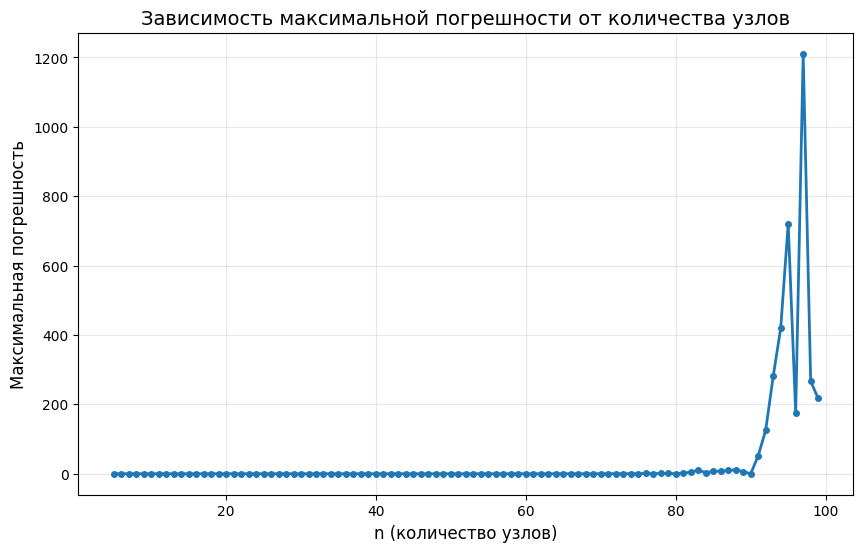

In [109]:
import matplotlib.pyplot as plt

n_array = [i for i in range(5, 100)]
max_error_rate = []

for n in n_array:
    error_rate = []
    for x in get_tab_x(n=10):
        interpolate_points = [Point(x, series(x)) for x in get_tab_x(n=n)]
        f_s = series(x)
        f_lp = lagrange_polynomial(x, interpolate_points)
        error_rate.append(abs(f_s - f_lp))
    max_error_rate.append(max(error_rate))

plt.figure(figsize=(10, 6))
plt.plot(n_array, max_error_rate, marker='o', linestyle='-', linewidth=2, markersize=4)
plt.xlabel('n (количество узлов)', fontsize=12)
plt.ylabel('Максимальная погрешность', fontsize=12)
plt.title('Зависимость максимальной погрешности от количества узлов', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

## Табулирование функции на $[a, b]$ в узлах Чебышева

In [110]:
import math
def get_tab_x_cheb(a: int = 0, b: int = 4, n: int = 5) -> list[float]:
    tab_x = []
    for i in range(n + 1):
        x_i = (a + b) / 2 + (b - a) / 2 * math.cos(math.pi * (2*i + 1) / (2*n + 2))
        tab_x.append(x_i)
    return tab_x

## Повторное построение графика изменения погрешности

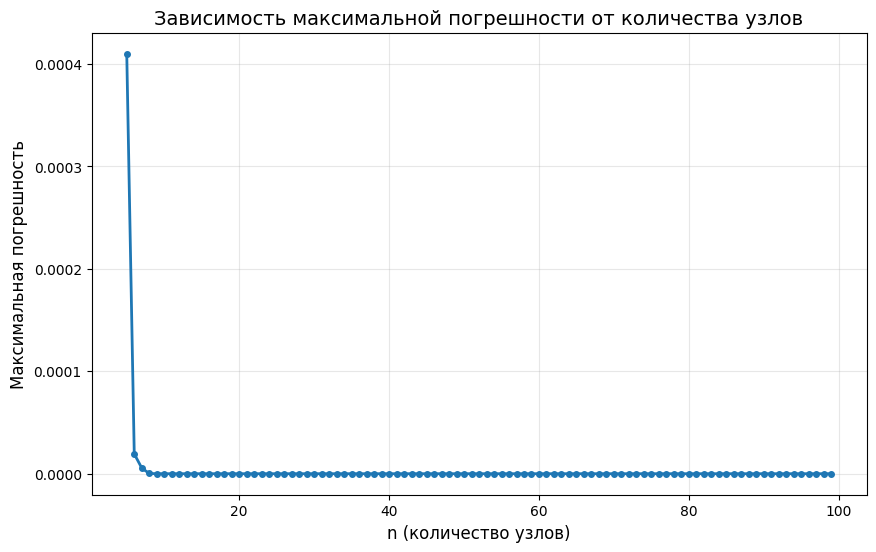

In [111]:
n_array = [i for i in range(5, 100)]
max_error_rate = []

for n in n_array:
    error_rate = []
    for x in get_tab_x(n=10):
        interpolate_points = [Point(x, series(x)) for x in get_tab_x_cheb(n=n)]
        f_s = series(x)
        f_lp = lagrange_polynomial(x, interpolate_points)
        error_rate.append(abs(f_s - f_lp))
    max_error_rate.append(max(error_rate))

plt.figure(figsize=(10, 6))
plt.plot(n_array, max_error_rate, marker='o', linestyle='-', linewidth=2, markersize=4)
plt.xlabel('n (количество узлов)', fontsize=12)
plt.ylabel('Максимальная погрешность', fontsize=12)
plt.title('Зависимость максимальной погрешности от количества узлов', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

# Вывод

В ходе выполнения работы были изучены и сравнены различные методы приближенного вычисления интегрального синуса $Si(x)$.
Для эффективного вычисления функции был получен ряд Тейлора и найдено отношение последующих членов ряда к предыдущим, что позволило оптимизировать алгоритм вычислений без повторного расчета факториалов. Функция была протабулирована на отрезке $[0, 4]$ с заданной точностью $\epsilon = 10^{-6}$.

На основе полученной таблицы значений был построен интерполяционный полином Лагранжа. Анализ погрешности показал, что при использовании равномерной сетки узлов интерполяции максимальная погрешность имеет тенденцию к возрастанию с увеличением количества узлов, что связано с явлением Рунге — характерным поведением полиномов высоких степеней на границах интервала.

Для улучшения качества интерполяции была применена сетка узлов Чебышева. График зависимости погрешности от количества узлов показал существенное улучшение результатов: погрешность монотонно убывает с ростом числа узлов интерполяции. Это подтверждает теоретическое преимущество использования чебышевских узлов для интерполяции функций — они минимизируют максимальную погрешность интерполяции и устраняют эффект Рунге.

Таким образом, выбор узлов интерполяции критически важен для точности приближения функций полиномами Лагранжа, и узлы Чебышева являются оптимальным выбором для равномерной минимизации погрешности на всем интервале.

# Используемая литература

1. Бахвалов Н.С., Жидков Н.П., Кобельков Г.М. Численные методы. — М.: Лаборатория Базовых Знаний, 2000. — 630 с.
2. Калиткин Н.Н. Численные методы. — М.: Наука, 1978. — 512 с.
3. [NumPy Documentation](https://numpy.org/doc/)
4. [Pandas Documentation](https://pandas.pydata.org/docs/)
5. [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
6. [Python Documentation](https://docs.python.org/3/)